In [ ]:

#| hide
from hybridpredictmaize22.GEMdataset import *


In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler
from pathlib import Path

In [ ]:
path_snps = Path('data/snpCompress/')
data_path = Path('data/')

path_train_weatherTable =data_path/'Training_Data/4_Training_Weather_Data_2014_2021.csv'
path_train_yieldTable = data_path/'Training_Data/1_Training_Trait_Data_2014_2021.csv'

In [ ]:
for p in path_snps.iterdir():
    print(p)
     

data/snpCompress/EVEN_10
data/snpCompress/EVEN_100
data/snpCompress/EVEN_50
data/snpCompress/PCS_10
data/snpCompress/PCS_50


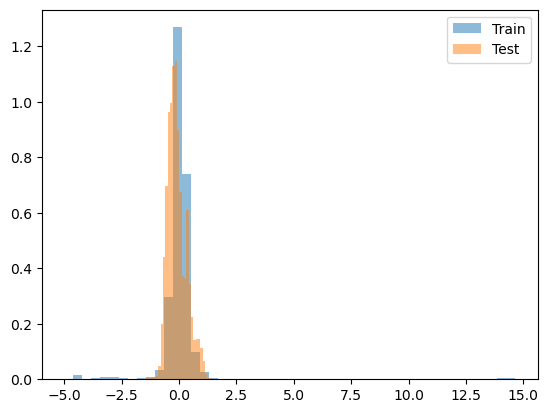

In [ ]:
snp_data = collect_snps(path_snps/'EVEN_10') # Read in the SNP profiles
yield_data = pd.read_csv(path_train_yieldTable) # Read in trait data 
yield_data = yield_data[yield_data['Twt_kg_m3'].notnull()] #Remove plots w/ missing yields
weather_data = pd.read_csv(path_train_weatherTable) # Read in Weather Data
weather_data['Year'] = [x.split('_')[1] for x in weather_data['Env']] #Store Year in a new column
#removes yield data where no weather data
setYield = set(yield_data['Env'])
setWeather = set(weather_data['Env'])
only_yield = setYield - setWeather
only_weather = setWeather - setYield
yield_data = yield_data.iloc[[x not in only_yield for x in yield_data['Env']],:]

#removes yield data where no genotype data
setSNP = set(snp_data[0])
setYield = set(yield_data['Hybrid'])
only_yield = setYield - setSNP
yield_data = yield_data.iloc[[x not in only_yield for x in yield_data['Hybrid']],:]

#Create a GEM dataset
test_split = 2019
gem = GEM(test_split)
gem.Y = YT(yield_data, test_split)
gem.W = WT(weather_data, test_split)
gem.SNP = collect_snps(path_snps/'PCS_10')

#example of how to unscale a value
gem.Y.scaler.inverse_transform(np.array(1.4).reshape(-1,1))

gem.Y.plot_yields()


In [ ]:
ds = GemDataset(gem.W.Tr, gem.Y.Tr, gem.SNP)
next(iter(ds))


(-0.18528135372386198,
 array([-0.01253692, -0.01967193,  0.00168105,  0.00032169, -0.00813794,
         0.00743239,  0.0462733 ,  0.01858733,  0.02131127,  0.01090407,
        -0.01276276, -0.01079581,  0.00627322,  0.00424592,  0.01983922,
         0.00113758,  0.02037995, -0.04411978,  0.00908802,  0.02615271]),
 array([[-0.94956556, -0.8726575 ,  1.46278892, ...,  1.48533658,
          0.45331378, -0.41283883],
        [-0.78933327, -0.57299712,  0.93104601, ...,  1.48533658,
         -1.31374802,  0.72226319],
        [-1.28422795, -1.6500783 ,  1.22499085, ...,  1.48533658,
          0.51209526, -0.19095054],
        ...,
        [-0.71428776, -0.4589754 ,  1.28444037, ...,  1.01572727,
         -1.3101307 ,  0.06867386],
        [-1.02461107, -0.98290991,  1.47930268, ...,  1.01572727,
         -0.46186869, -0.40529161],
        [-1.17267382, -1.30895548,  1.49581643, ...,  1.01572727,
          0.48315668, -0.41283883]]))